## website scraping

In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np 
import re
import seaborn as sns 
import matplotlib.pyplot as plt

# Step 1: Fetch the page
url = "https://www.treasuretv.org/all-time"
response = requests.get(url)
soup = BeautifulSoup(response.text, "html.parser")

# Step 2: Parse the table
table = soup.find("table")
rows = table.find_all("tr")[1:]  # skip header row

# Step 3: Extract data into a list of dictionaries
data = []
for row in rows:
    cols = row.find_all("td")
    if len(cols) >= 4:
        rank = cols[0].text.strip()
        title = cols[1].text.strip()
        debut_year = cols[2].text.strip()
        full_run = cols[3].text.strip()
        data.append({
            "Rank": rank,
            "Title": title,
            "Debut Year": debut_year,
            "Full Run": full_run
        })

# Step 4: Create DataFrame and export to CSV
df = pd.DataFrame(data)
df.to_csv("treasuretv_top_shows.csv", index=False)

print("✅ CSV file created: treasuretv_top_shows.csv")
df

✅ CSV file created: treasuretv_top_shows.csv


,Rank,Title,Debut Year,Full Run
0,1,Breaking Bad,2008,2008–2013
1,2,The Simpsons,1989,1989–Present
2,3,The Wire,2002,2002–2008
3,4,The Sopranos,1999,1999–2007
4,5,Game of Thrones,2011,2011–2019
...,...,...,...,...
995,996,The Goldbergs,2013,2013–Present
996,997,Project Runway,2004,2004–Present
997,998,Kung Fu,1972,1972–1975
998,999,The Life and Legend of Wyatt Earp,1955,1955–1961


## Load data from csv

In [3]:
df = pd.read_csv(r"C:\Users\hp\Downloads\treasuretv_top_shows.csv")
df

,Rank,Title,Debut Year,Full Run
0,1,Breaking Bad,2008,2008–2013
1,2,The Simpsons,1989,1989–Present
2,3,The Wire,2002,2002–2008
3,4,The Sopranos,1999,1999–2007
4,5,Game of Thrones,2011,2011–2019
...,...,...,...,...
995,996,The Goldbergs,2013,2013–Present
996,997,Project Runway,2004,2004–Present
997,998,Kung Fu,1972,1972–1975
998,999,The Life and Legend of Wyatt Earp,1955,1955–1961


## data cleaning

In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Rank        1000 non-null   int64 
 1   Title       1000 non-null   object
 2   Debut Year  1000 non-null   int64 
 3   Full Run    1000 non-null   object
dtypes: int64(2), object(2)
memory usage: 31.4+ KB


In [5]:
df = df.drop_duplicates()


In [6]:
df = df.convert_dtypes()

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Rank        1000 non-null   Int64 
 1   Title       1000 non-null   string
 2   Debut Year  1000 non-null   Int64 
 3   Full Run    1000 non-null   string
dtypes: Int64(2), string(2)
memory usage: 33.3 KB


## questions

1-Which show debuted the earliest?

2-Which show is still running (marked as "Present")?

3-How many shows debuted before the year 2000?

4-What is the average debut year of all the shows?

5-Are there more shows that started in the 2000s or 2010s?

6-What percentage of shows on the list started after 2010?

7-What is the most common decade for show debuts?

8-Is there a correlation between debut year and rank?

     Rank         Title  Debut Year  \
120   121  Looney Tunes        1930   

                                          Full Run  
120  1930–1969 • 1960–2000 • 1964–1967 • 1966–1973  


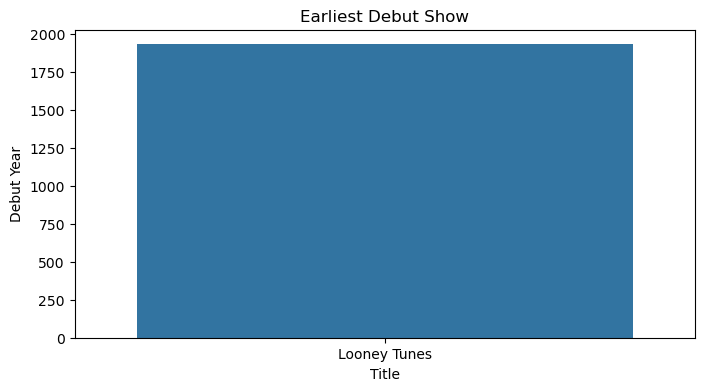

In [8]:
# Question 1: Earliest Debut
earliest_show = df[df['Debut Year'] == df['Debut Year'].min()]
print(earliest_show)
plt.figure(figsize=(8, 4))
sns.barplot(x='Title', y='Debut Year', data=earliest_show)
plt.title("Earliest Debut Show")
plt.show()


     Rank                     Title  Debut Year                  Full Run
1       2              The Simpsons        1989              1989–Present
10     11                Doctor Who        1963  1963–1989 • 2005–Present
15     16                South Park        1997              1997–Present
16     17           Stranger Things        2016              2016–Present
24     25      Curb Your Enthusiasm        2000              2000–Present
..    ...                       ...         ...                       ...
963   964     Fear the Walking Dead        2015              2015–Present
969   970  A Black Lady Sketch Show        2019              2019–Present
984   985                     Cheer        2020              2020–Present
995   996             The Goldbergs        2013              2013–Present
996   997            Project Runway        2004              2004–Present

[150 rows x 4 columns]


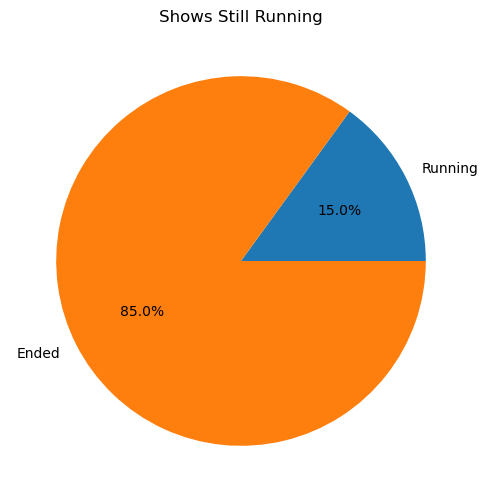

In [9]:

# Question 2: Shows Still Running
still_running = df[df['Full Run'].str.contains("Present")]
print(still_running)
plt.figure(figsize=(6, 6))
plt.pie([len(still_running), len(df) - len(still_running)], labels=['Running', 'Ended'], autopct='%1.1f%%')
plt.title("Shows Still Running")
plt.show()


     Rank                              Title  Debut Year          Full Run
1       2                       The Simpsons        1989      1989–Present
3       4                       The Sopranos        1999         1999–2007
6       7                         Twin Peaks        1990  1990–1991 • 2017
7       8                           Seinfeld        1989         1989–1998
8       9                            Friends        1994         1994–2004
..    ...                                ...         ...               ...
989   990       Mighty Morphin Power Rangers        1993  1993–1995 • 2010
992   993                              Riget        1994       1994 • 1997
994   995                         The F.B.I.        1965         1965–1974
997   998                            Kung Fu        1972         1972–1975
998   999  The Life and Legend of Wyatt Earp        1955         1955–1961

[408 rows x 4 columns]


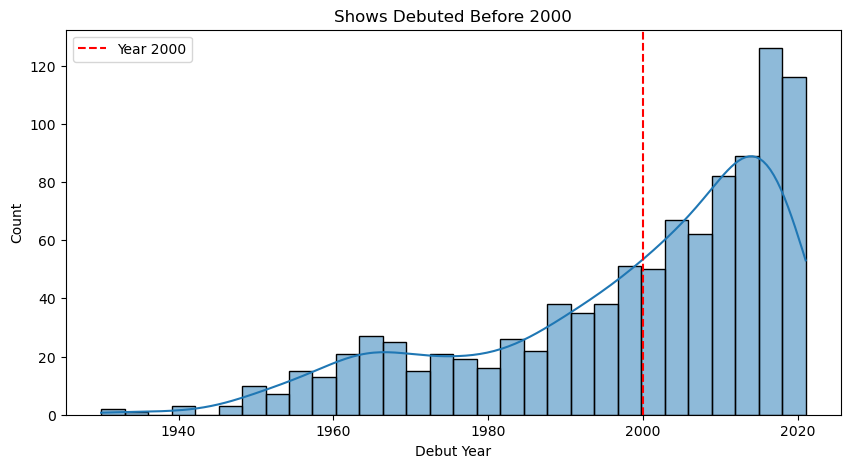

In [10]:

# Question 3: Shows Debuted Before 2000
before_2000 = df[df['Debut Year'] < 2000]
print(before_2000)
plt.figure(figsize=(10, 5))
sns.histplot(df['Debut Year'], bins=30, kde=True)
plt.axvline(x=2000, color='red', linestyle='--', label='Year 2000')
plt.legend()
plt.title("Shows Debuted Before 2000")
plt.show()

The most common debut year is: 2015


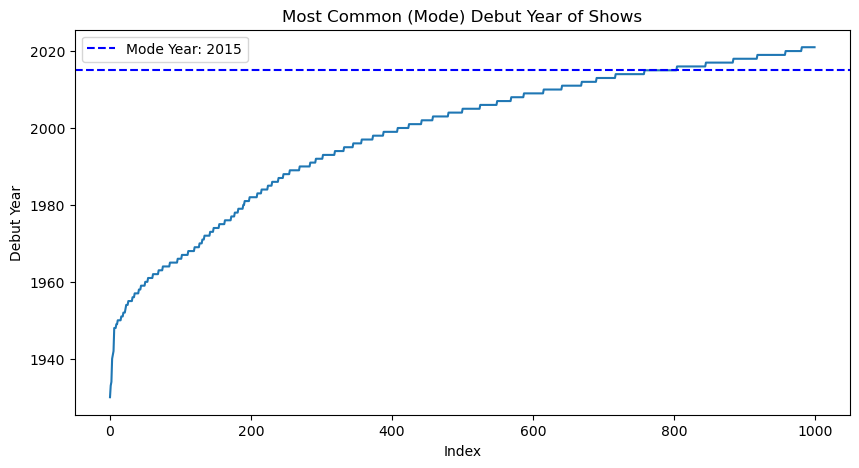

In [11]:
# question 4: most common debut year
mode_year = df['Debut Year'].mode()[0]
print(f"The most common debut year is: {mode_year}")
plt.figure(figsize=(10, 5))
sns.lineplot(x=range(len(df)), y=sorted(df['Debut Year']))
plt.axhline(y=mode_year, color='blue', linestyle='--', label=f'Mode Year: {mode_year}')
plt.legend()
plt.title("Most Common (Mode) Debut Year of Shows")
plt.xlabel("Index")
plt.ylabel("Debut Year")
plt.show()


Debut Year
1930      3
1940      8
1950     39
1960     77
1970     62
1980     80
1990    139
2000    207
2010    343
2020     42
Name: Title, dtype: int64


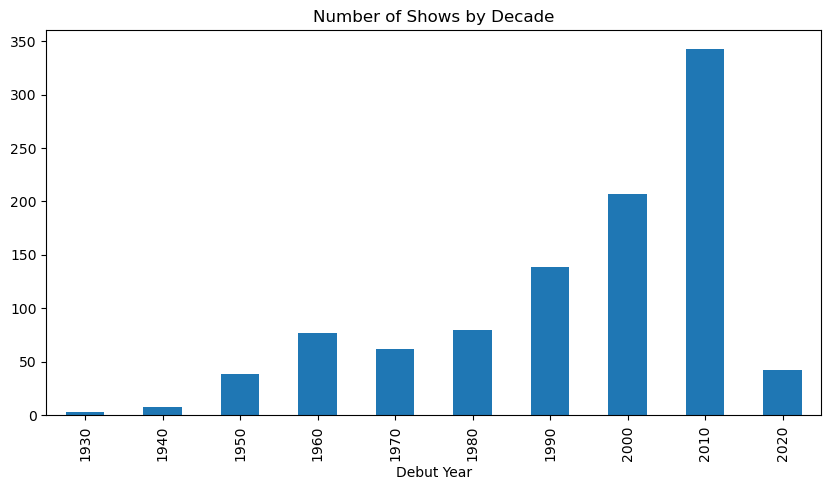

In [12]:
# Question 5: Comparison Between 2000s and 2010s
decades = df.groupby(df['Debut Year'] // 10 * 10)['Title'].count()
print(decades)
plt.figure(figsize=(10, 5))
decades.plot(kind='bar')
plt.title("Number of Shows by Decade")
plt.show()


35.9 %


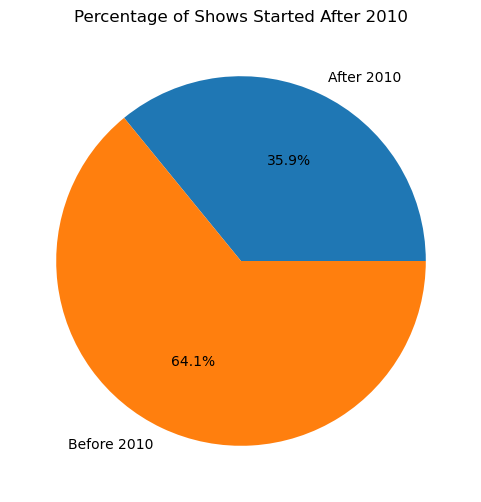

In [13]:
# Question 6: Percentage Started After 2010
after_2010 = len(df[df['Debut Year'] > 2010]) / len(df) * 100
print(after_2010,"%")
plt.figure(figsize=(6, 6))
plt.pie([after_2010, 100 - after_2010], labels=['After 2010', 'Before 2010'], autopct='%1.1f%%')
plt.title("Percentage of Shows Started After 2010")
plt.show()

2010


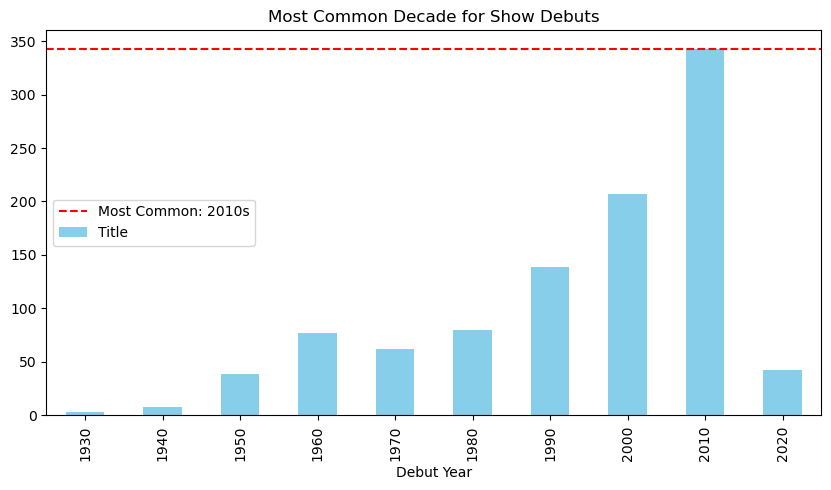

In [14]:
# Question 7: Most Common Decade for Show Debuts
most_common_decade = decades.idxmax()
print(most_common_decade)
plt.figure(figsize=(10, 5))
decades.plot(kind='bar', color='skyblue')
plt.axhline(y=decades[most_common_decade], color='red', linestyle='--', label=f'Most Common: {most_common_decade}s')
plt.legend()
plt.title("Most Common Decade for Show Debuts")
plt.show()

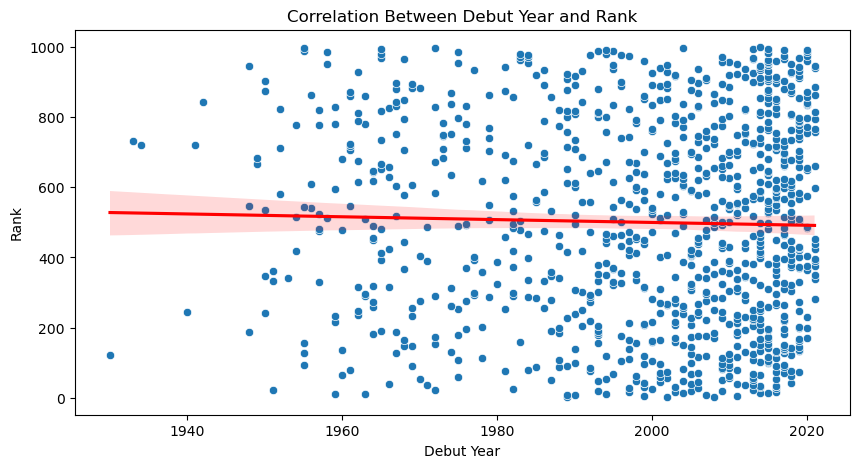

In [15]:
# Question 8: Correlation Between Debut Year and Rank
plt.figure(figsize=(10, 5))
sns.scatterplot(x='Debut Year', y='Rank', data=df)
sns.regplot(x='Debut Year', y='Rank', data=df, scatter=False, color='red')
plt.title("Correlation Between Debut Year and Rank")
plt.show()
